# Assignment 1

Hello and welcome to our Assignment 1. Notice we used the csv file so the smaller version. Comments will also be regarding what we see using this dataset. Enjoy the read :).

## Part 1: Temporal Patterns

In this assignment, we look only at the focus-crimes in the exercise:

In [1]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

### 1.1 Weekly patterns

Firstly, an objective of this programming is to investigate what happens during each weekday.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import datetime

In [3]:
# Get the file path
os.getcwd()

'C:\\Users\\Christian_G\\Assignment1'

In [4]:
# Get the file name
file_path = 'C:\\Users\\Christian_G\\Assignment1'
os.listdir(file_path)

['.ipynb_checkpoints',
 'Assignment_1-complied changed by Henan.ipynb',
 'Assignment_1-complied.ipynb',
 'Assignment_1.ipynb',
 'Part 4.ipynb',
 'Police_Department_Incident_Reports__2018_to_Present.csv',
 'Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv']

Check if you have the file *Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv* in the folder else the code will not compile if you make a mistake and run the code.

In [5]:
# Load the data
file_name = 'Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv'
df = pd.read_csv(file_name)

In [6]:
df.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4018830907041,40188309,7041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13605159706372,136051597,6372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
2,13618826906244,136188269,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,...,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN
3,4098938926105,40989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0
4,5085058207021,50850582,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,66.0


In [7]:
# In order to categorize more easily, we create a column of datetime
df['Datetime'] = df['Date'].str.cat(df['Time'],sep=' ')
df["Datetime"] = df["Datetime"].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y %H:%M"))

In [8]:
# Get the list of focus crimes 
focuscrimes = list(focuscrimes)
focuscrimes.sort()

In [9]:
# Define a fuction to plot the crime picture
def plot_crime_pattern(column,x,plot_fun=plt.bar):
    # column: the pattern that we want to show; this should be a string
    # x: the x list that will be used for plot 
    # plot_fun: the function that we want to plot the picture
    
    y = df.groupby("Category")[column].value_counts()
    plt.figure(figsize=(20,30),dpi=150)
    for i in range(14):
        crime = focuscrimes[i]
        y_ = y[crime].reindex(index=x, fill_value=0)
        plt.subplot(7,2,i+1)
        if plot_fun == plt.bar:
            plot_fun(x,y_,color="royalblue",edgecolor="black")
        else:
            plot_fun(x,y_,color="royalblue")
        plt.ylabel("crime count")
        plt.title(crime)
        plt.xticks()
        plt.yticks()
    plt.show()

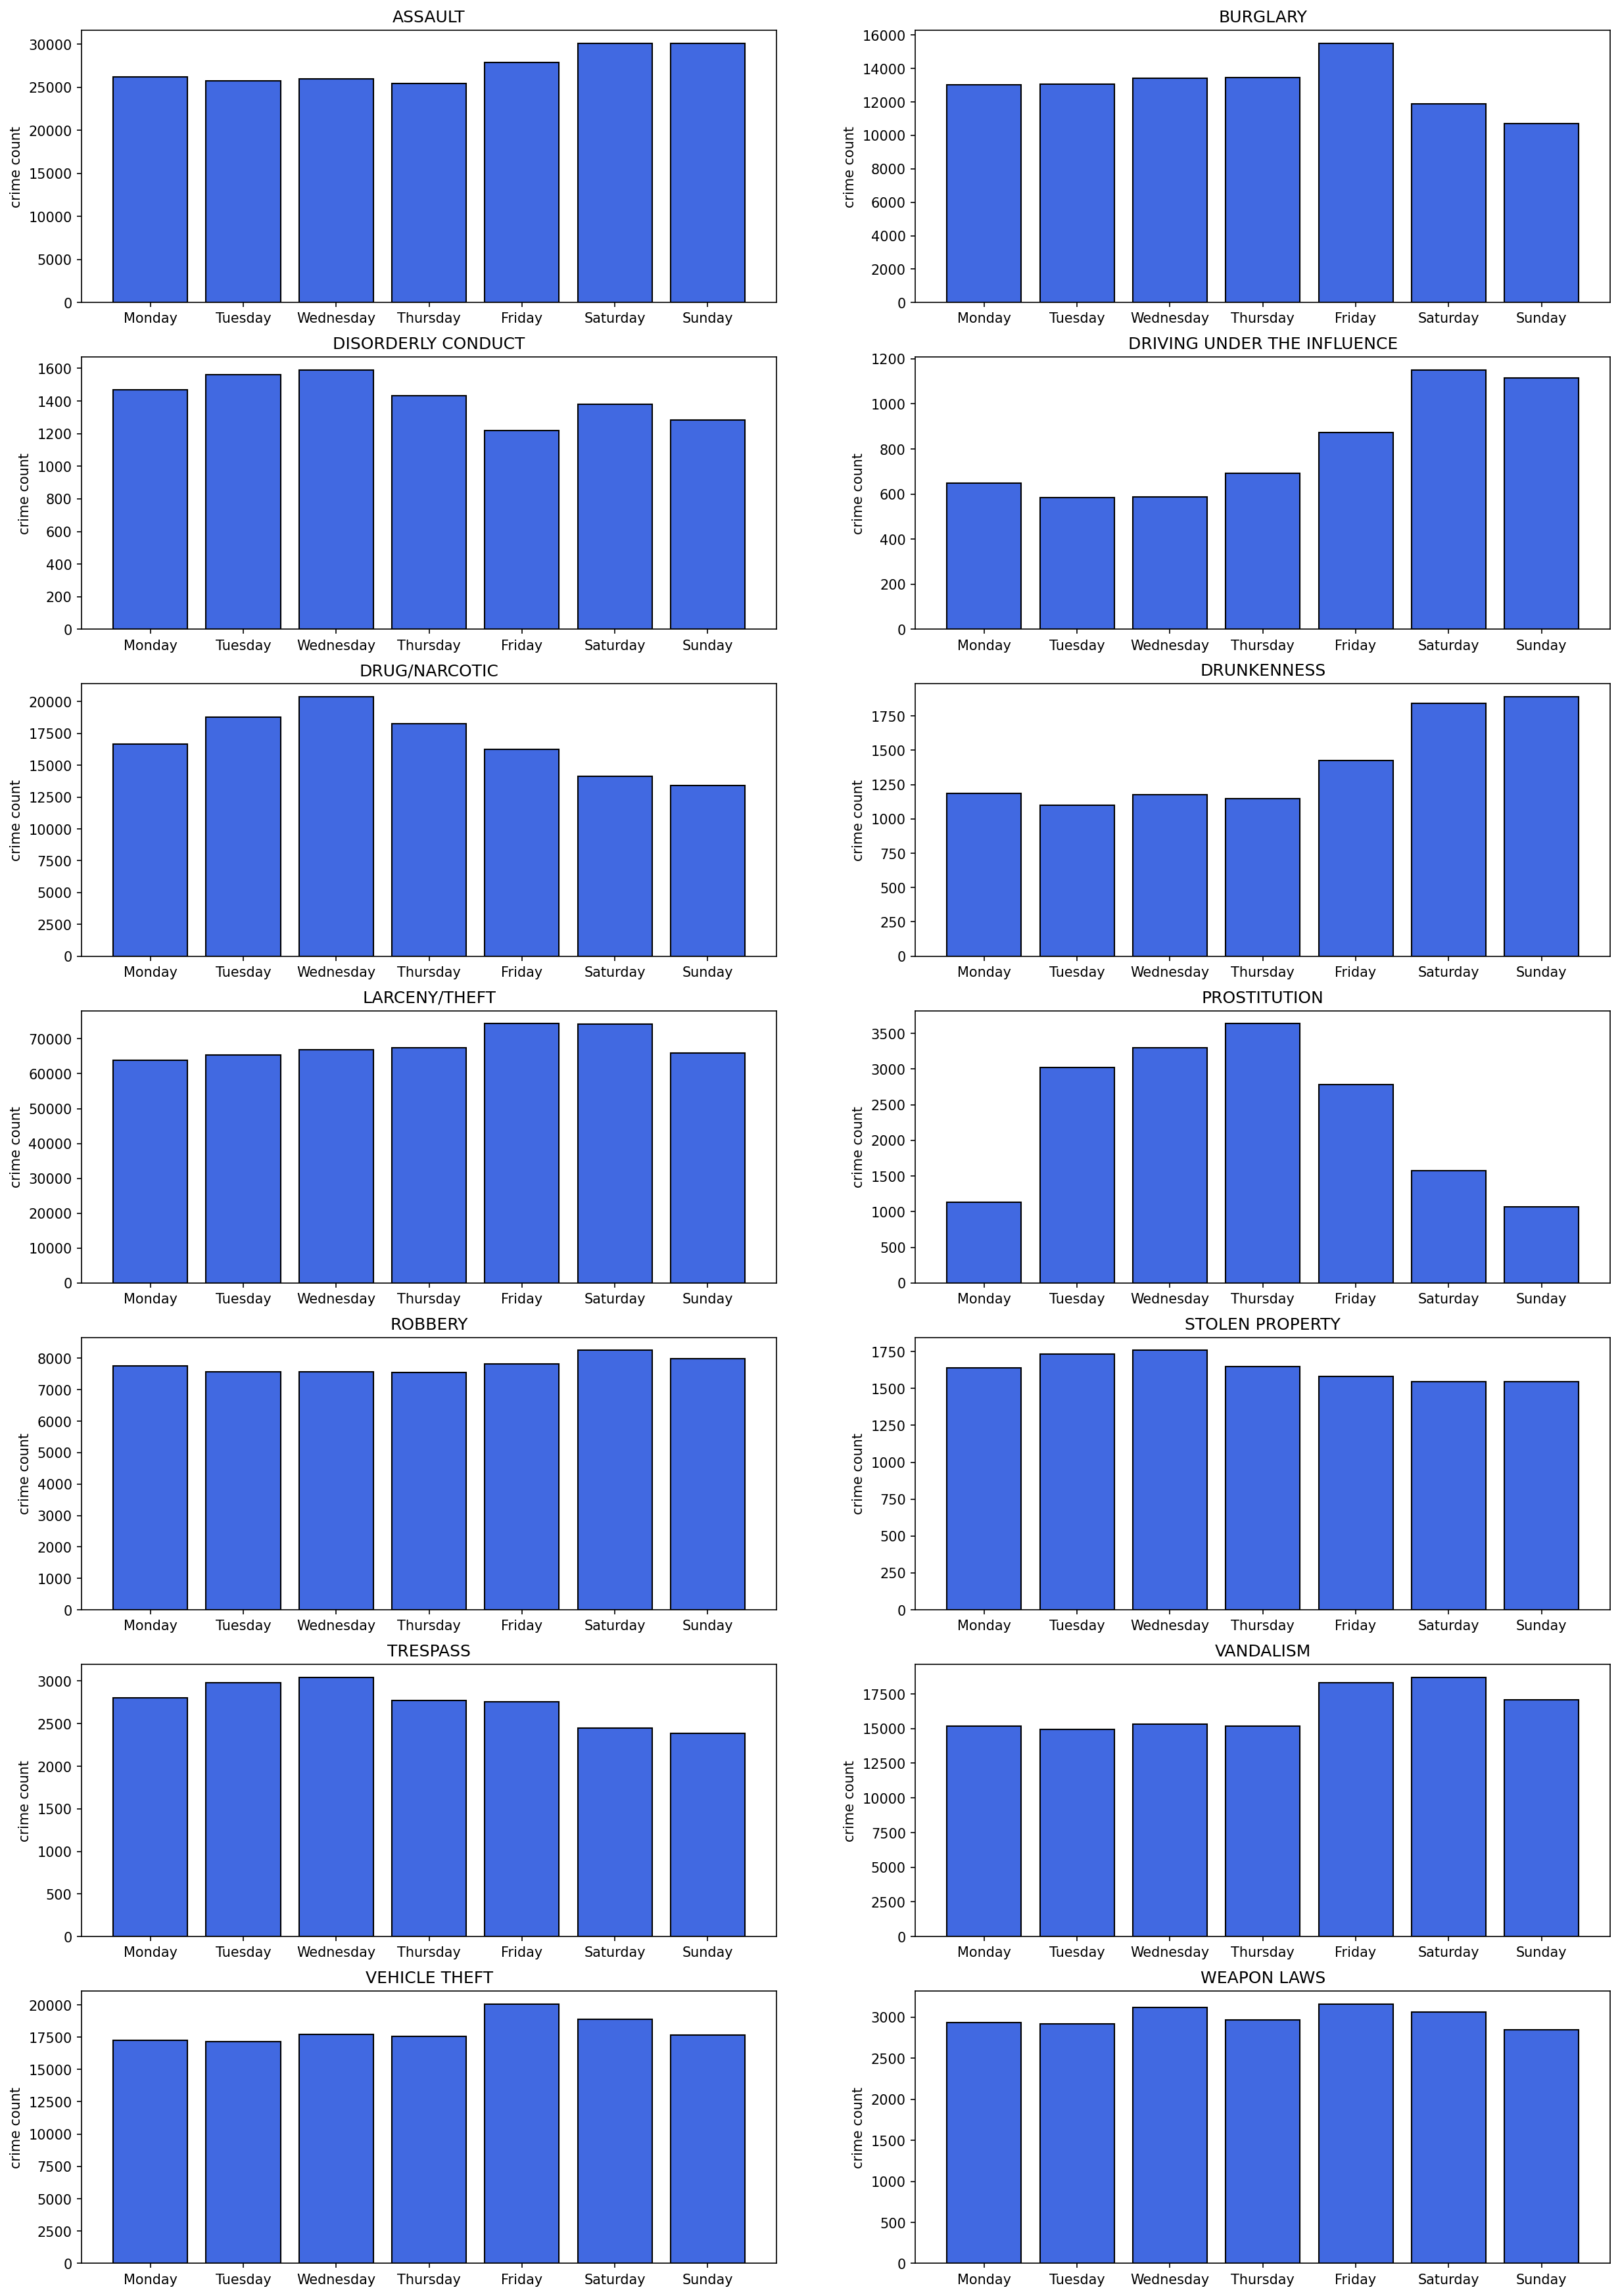

In [10]:
# Now, draw the picture of weekly patterns
weekday = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
plot_crime_pattern("DayOfWeek",weekday)

There are some helpful clues that we can find in the above picture. For example, crimes of burglary reach the peak on Friday. It shows that residents need to strengthen their defenses this evening, and the police need to improve their police deployment. Also, the amount of driving under the influence is likely to continue increasing during the weekdays, so more strict traffic control is needed on weekends. More specially, the distribution of crimes of prostitution is close to the normal distribution. It rises to a high point and peaks on Thursday.  

### 1.2 The months

 We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec.

In [11]:
# Define a function that transform the datetime info to month words
def month_word(month):
    if month == 1:
        return "Jan."
    elif month == 2:
        return "Feb."
    elif month == 3:
        return "Mar."
    elif month == 4:
        return "Apr."
    elif month == 5:
        return "May."
    elif month == 6:
        return "Jun."
    elif month == 7:
        return "Jul."
    elif month == 8:
        return "Aug."
    elif month == 9:
        return "Sept."
    elif month == 10:
        return "Oct."
    elif month == 11:
        return "Nov."
    else:
        return "Dec."

In [12]:
# Create a column of month
df["Month"] = [month_word(el.month) for el in df["Datetime"]]

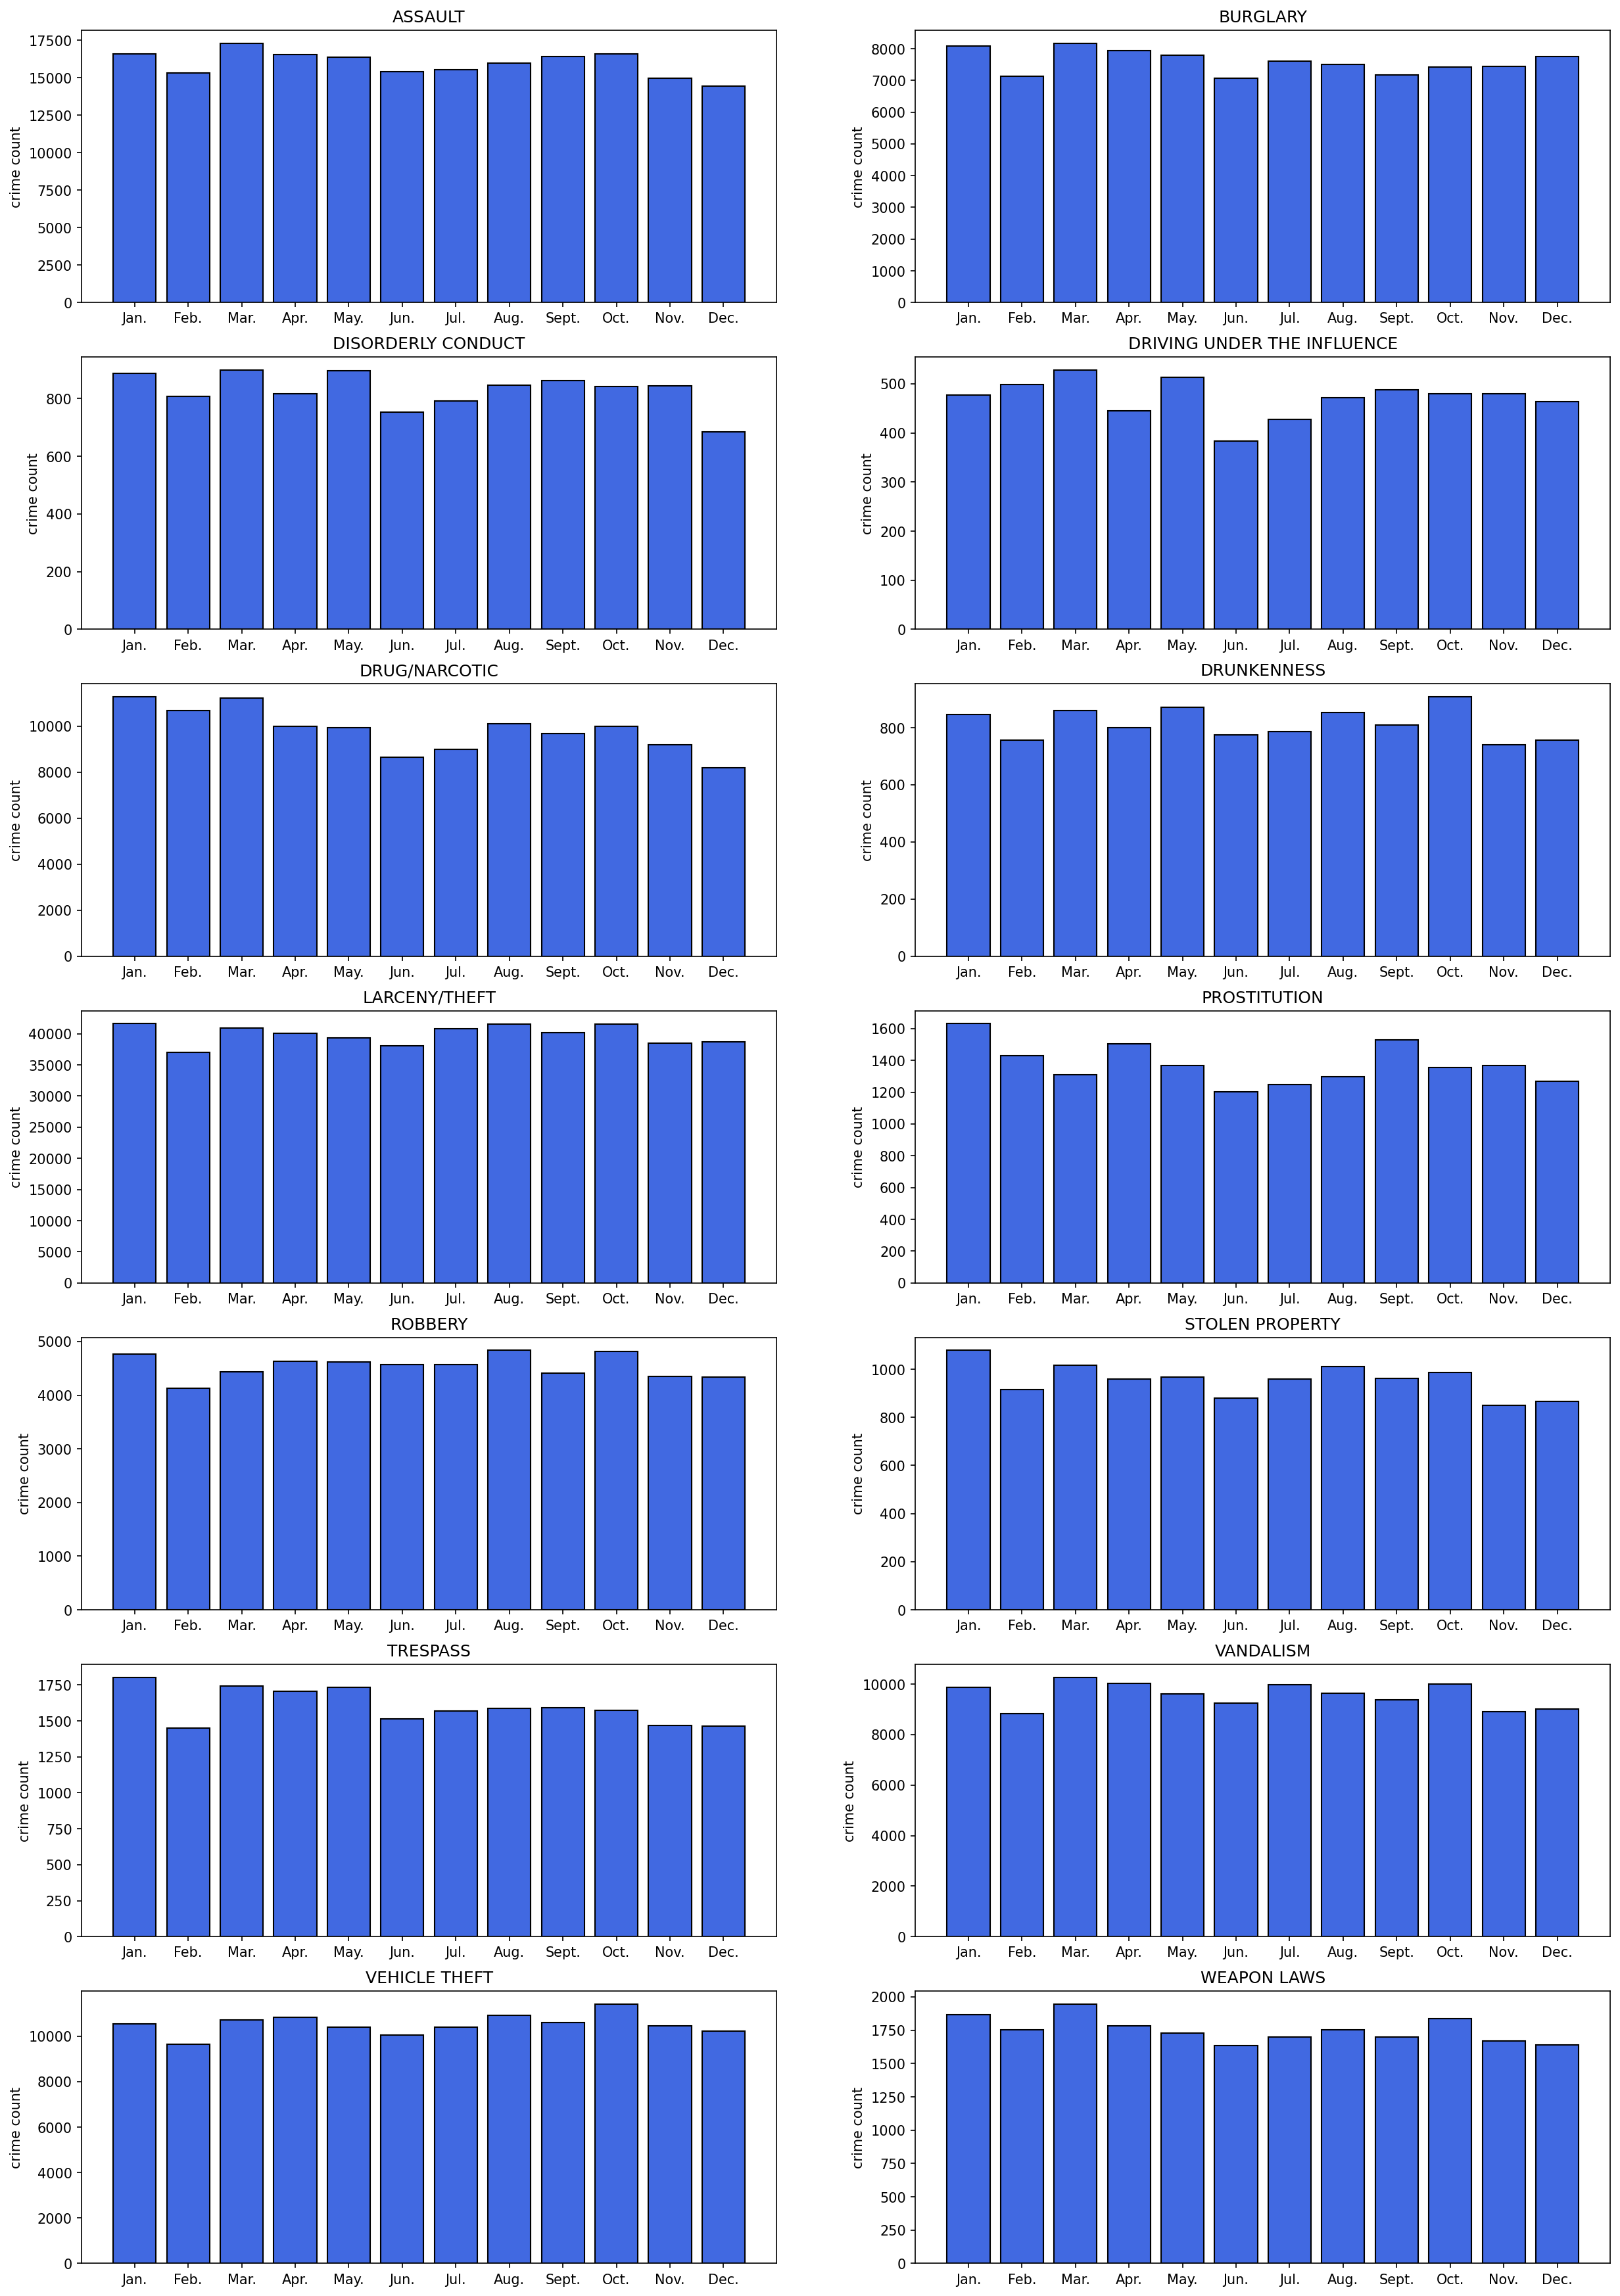

In [13]:
# Now, draw the picture of the months
months = ["Jan.","Feb.","Mar.","Apr.","May.","Jun.","Jul.","Aug.","Sept.","Oct.","Nov.","Dec."]

plot_crime_pattern("Month",months)

The graph shows that there are slight fluctuations in the crimes of these categories.

### 1.3 The 24 hour cycle

Next, we want to see the 24 hour cycle of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on.

In [14]:
# Create the column of 24-hour cycle
df["Hour"] = [el.hour for el in df["Datetime"]]

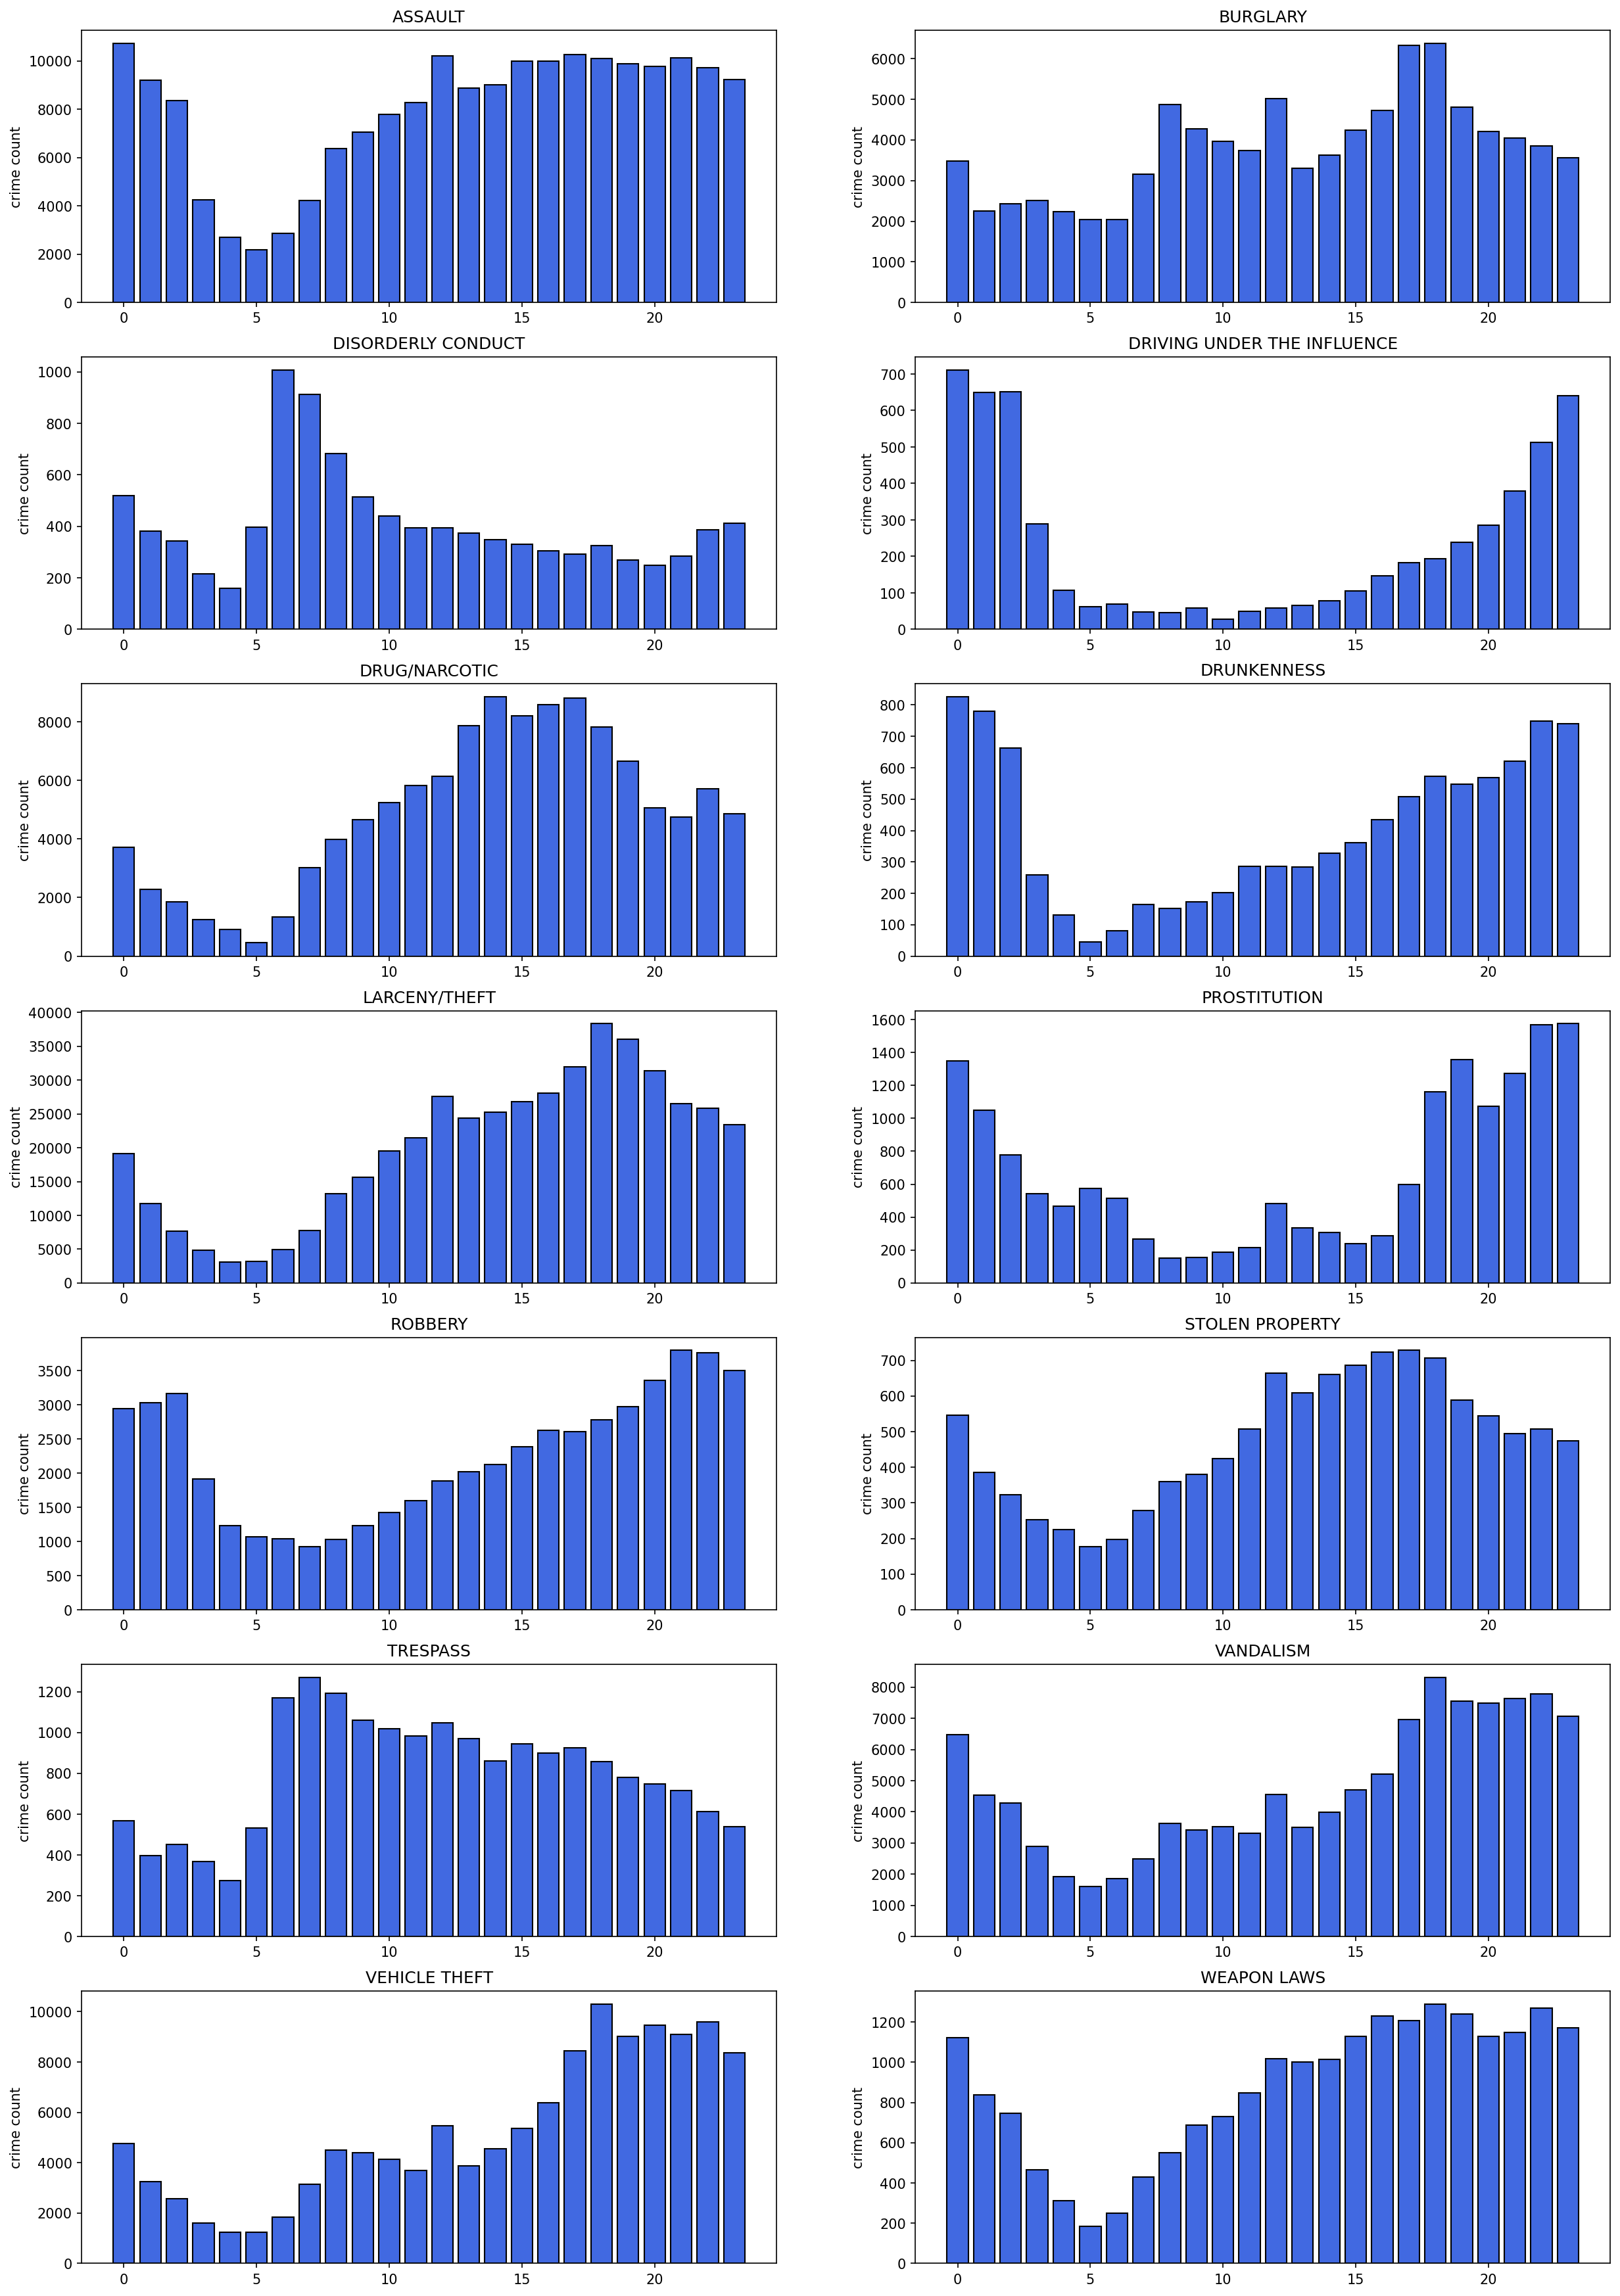

In [15]:
# Plot the picture
hour = list(set(df["Hour"]))
hour.sort()

plot_crime_pattern("Hour",hour)

Primarily, we can get some useful information about the crimes of driving under the influence. Most crimes that happened are concentrated within 8 pm to 4 am. So this reminds us that we need to pay more attention to traffic safety at this period, and the police should guarantee more traffic control. Besides, most kinds of crimes are likely to happen in the evening.

### 1.4 Hours of the week
<a id='Prostitution-spike'></a>

Finally, the pattern of hours of the week are also helpful to find something interesting.

In [17]:
# Create the column of week hours
weekdays_multipliers = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3,
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6
}
df["WeekHours"] = df.apply(lambda row: weekdays_multipliers[row["DayOfWeek"]]*24 + row["Datetime"].hour + (row["Datetime"].minute)/60, axis=1)

[To the bottom](#Bottem)

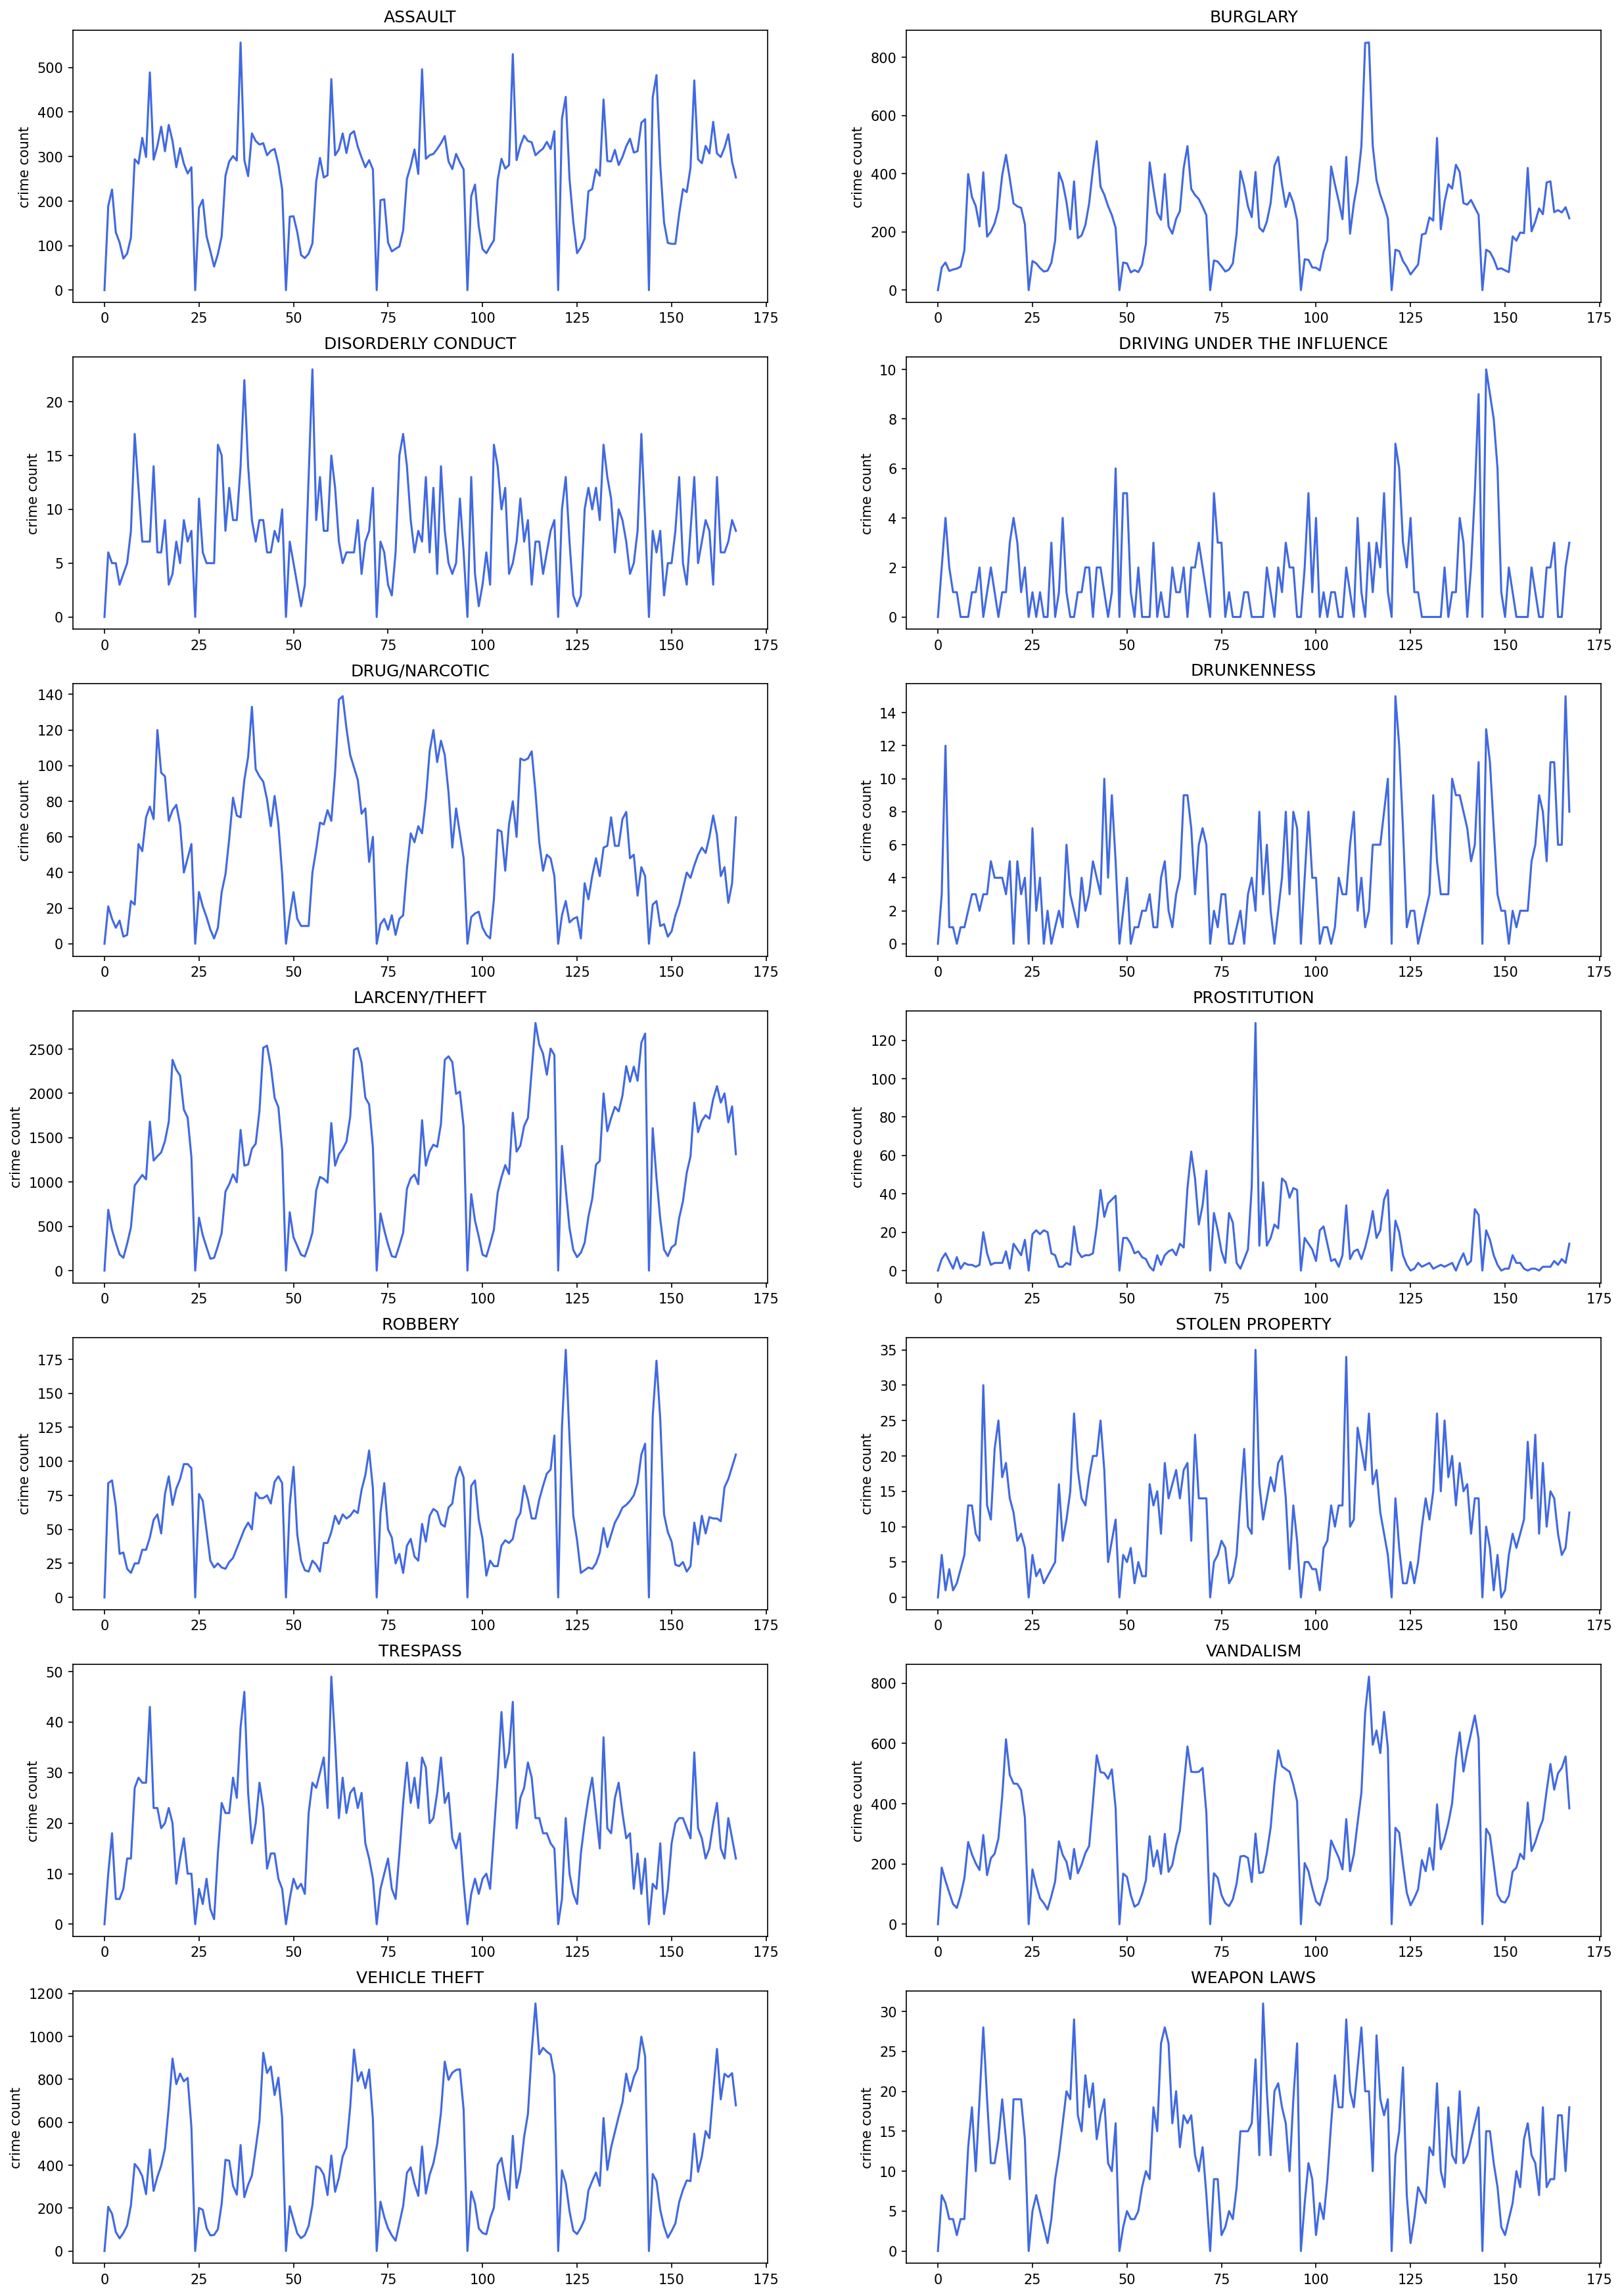

In [18]:
# Plot the picture
plot_crime_pattern("WeekHours",[i for i in range(168)],plot_fun=plt.plot)

It is noteworthy that the number of prostitution crimes would reach the highest point on Thursday evening.  Other kinds of crimes have regular day patterns during the week.

## Part 2: Thinking about data and visualization

### 2.1 Pearson correlation

_As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?_

Pearson coefficient is a value between -1 and 1 that can be used to identify two variables' correlation. Estimate the covariance and standard deviation of the sample to obtain the Pearson correlation coefficient, which is often represented by the letter r: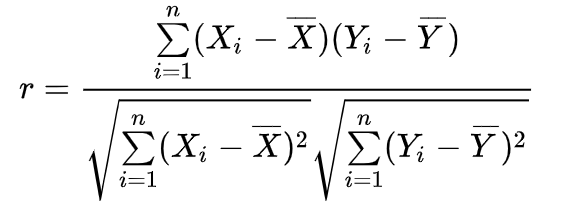

There are four situations: (1) If the linear relationship between two variables increases, the correlation coefficient tends to 1 or -1; (2) If one variable increases, the other variable also increases, indicating that there is a positive correlation between them, and the correlation coefficient is greater than 0; (3) If one variable increases, the other variable decreases, indicating that there is a negative correlation between them, and the correlation coefficient is less than 0; (4) If the correlation coefficient is equal to 0, there is no linearity relationship.

But it depends on the data involved, and sometimes it may be numerically unstable. Therefore, when the dataset is not sufficient, the Pearson correlation may be inaccurate.

### 2.2 What is the difference between a bar-chart and a histogram?

1. The bar graph uses the "length" of the bar to indicate each category's frequency, and its width (displaying category) is fixed.

2. The histogram uses "area" to indicate each group's frequency. The height of the rectangle indicates the frequency or frequency of each group, and the width indicates the group distance of each group. Hence, the height and width are both meaningful.

3. Due to the continuity of grouped data, the histogram's rectangles are usually arranged consecutively, while the bar graphs are arranged separately. So continuous grouping data can have a good view with histogram.

4. The bar graph is mainly used to display categorized data, while the histogram is used primarily to display data type data.


### 2.3 How to choose the right bin-size in histograms

1. Collect and record the number of data to find the maximum and minimum values. The number of data should be more than 100; if the number is not large, it should be at least 50
2. Divide the data into several groups; the number of groups is more appropriate between 5-15
3. Calculate the width of the group pitch. Divide the difference between the maximum value and the minimum value by the number of groups to find the group pitch's width.
4. Calculate the limit of each group. The limit of each group can be calculated sequentially from the first group. The lower limit of the first group is the minimum value minus half of the group distance, and the upper limit of the first group is its lower limit value plus the group distance. So on and so forth.

## Part 3: Generating important plot types

## 3.1 Jitter Plot

_First, let's make a jitter-plot (that is, code up something like Figure 2-1 from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the  𝑥 -axis and create vertical jitter._

In [19]:
# Define the function that help us to pick data
def pick_data_date(df, start_time,end_time):
    # df: dataframe we use
    # start_time: the start time of time interval
    # end time: the end time of time interval
    mask = (df["Date"] > start_time) & (df["Date"] <= end_time)
    return df.loc[mask]

def pick_data_time(df, start_time, end_time):
    # df: the dataframe we use
    # start_time: the start time of time interval
    # end time: the end time of time interval
    mask = (df['Time'] > start_time) & (df['Time'] <= end_time)
    return df.loc[mask]

In [20]:
# Transform the type of date column to datetime 
df['Date'] = pd.to_datetime(df['Date'])
# Create a column of time of hour
df["TimeOfHour"] = ((pd.DatetimeIndex(df['Datetime']).hour) * 60 + pd.DatetimeIndex(df['Datetime']).minute)/(60)

<a id='Jitter-plot'></a>

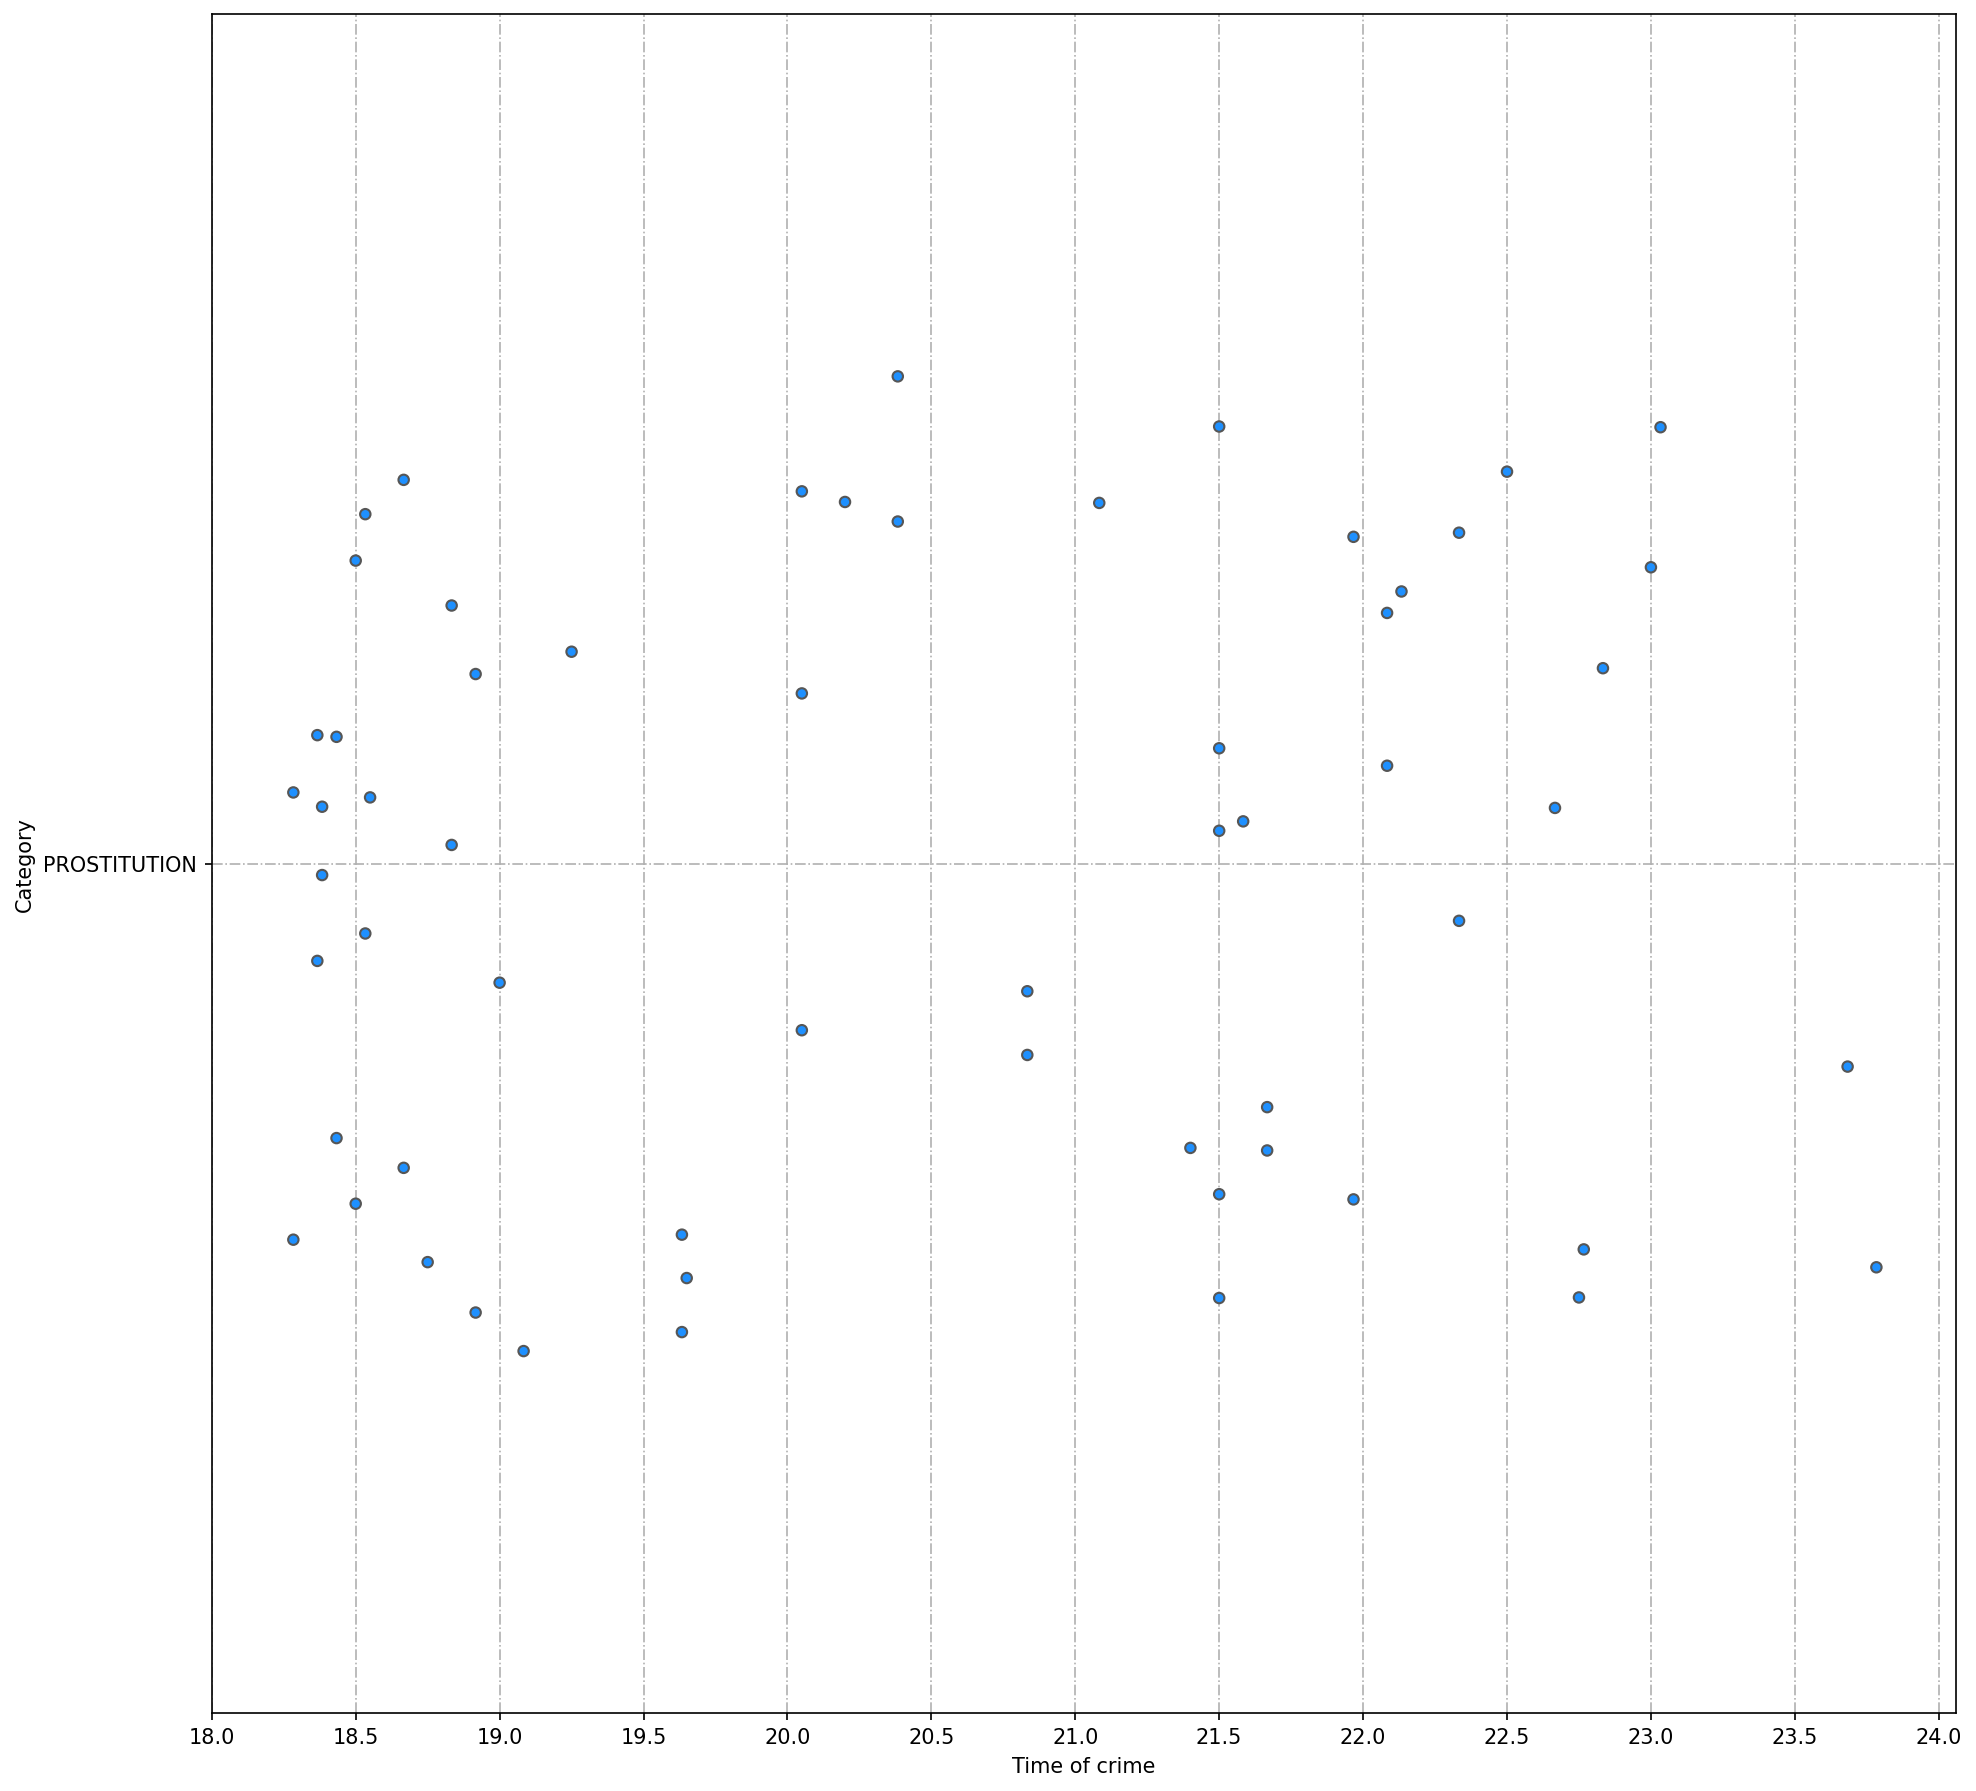

In [21]:
# Pick data by date
df_pick = pick_data_date(df,'2016-03-01','2016-06-01')

# Pick data by category
df_pick = df_pick[df_pick.Category == 'PROSTITUTION']

# Pick data by hour
df_pick = pick_data_time(df_pick,'18:00','24:00')

# Sort data by time of hour
df_pick= df_pick.sort_values(by = 'TimeOfHour')

# Draw jitter plot
plt.figure(figsize=(15,15),dpi=150)
jitter_plot = sns.stripplot(x="TimeOfHour",y="Category",data=df_pick,jitter = 0.3,marker = 'o',color = 'dodgerblue',linewidth = 1)
jitter_plot.set(xlabel = 'Time of crime',xticks = np.linspace(18,24,13,endpoint = True).tolist())
plt.grid(linestyle='-.')
plt.show()

From 01/03/2016 to 01/06/2016, we can see that more prostitution crimes happened from 6 pm to 7 pm based on the jitter plot. 

[To the bottom](#Bottem)

### 3.2 Histograms

_Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST Figure 2-2). (I think the GPS data could be fun to understand from this perspective.)_
* _This time, pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)_
* _Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram. This function gives you the counts and then you do your own plotting._

In [22]:
# Define a function to plot the histogram
def plot_hist(df,start_time, end_time,category,num):
    # df: the dataframe we use
    # start_time: the start time
    # end_time: the end time
    # category: the category of crime that we want to plot
    # num: the group numbers that we want to show in histogram    
    
    # Pick the data we need
    df = pick_data_date(df,start_time,end_time)
    df = df[df.Category == category]
    # Plot the histogram
    plt.figure(figsize=(20,8),dpi=150)
    hist,bin_edges = np.histogram(df.X,bins = num)
    plt.hist(bin_edges[:-1],num, weights=hist,color="royalblue",edgecolor="black")
    

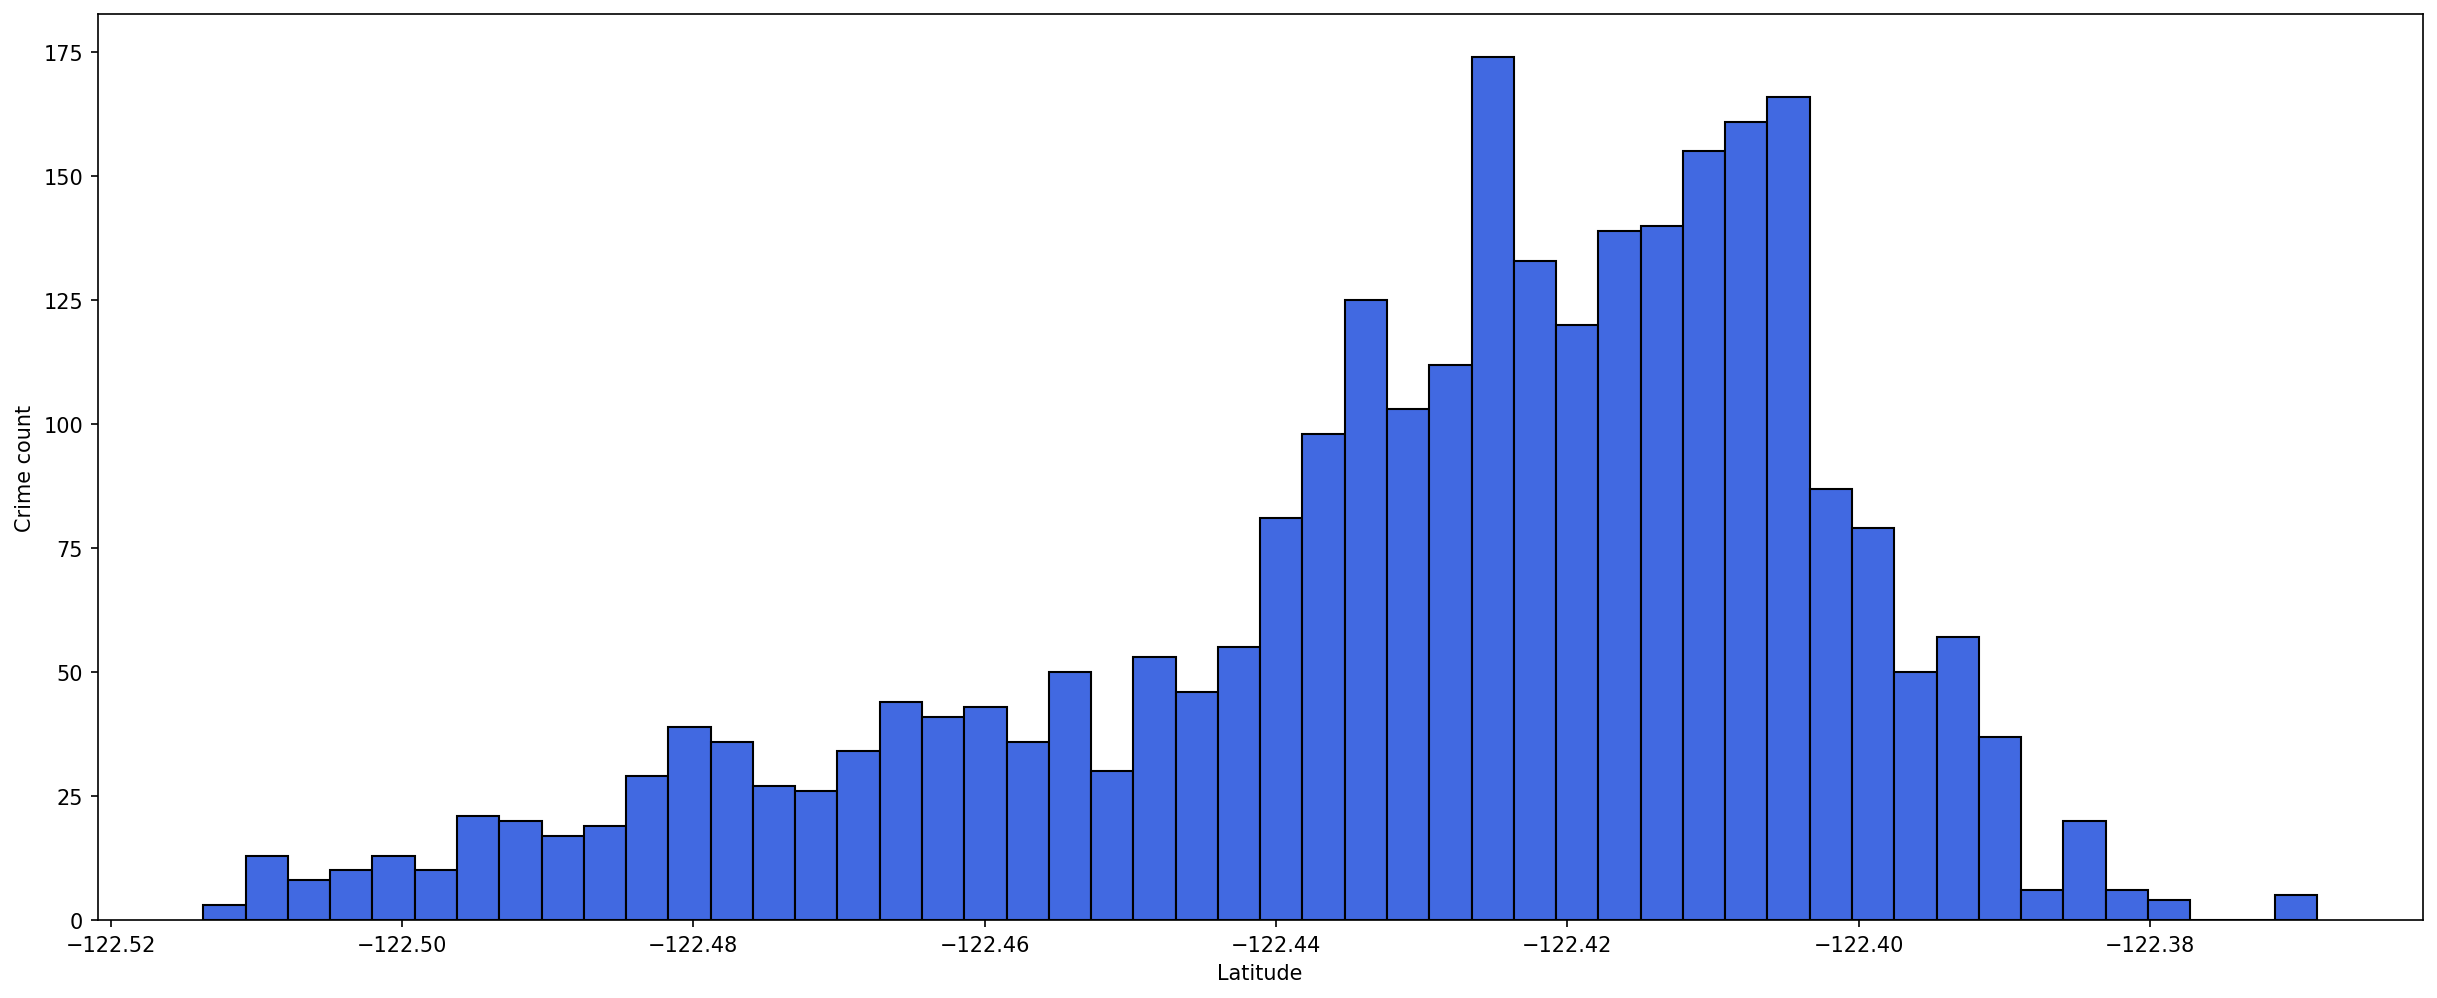

In [23]:
# The histogram of burglary crime
plot_hist(df,'2016-04-01','2016-10-01','BURGLARY',50)
plt.xlabel('Latitude')
plt.ylabel('Crime count')
plt.show()

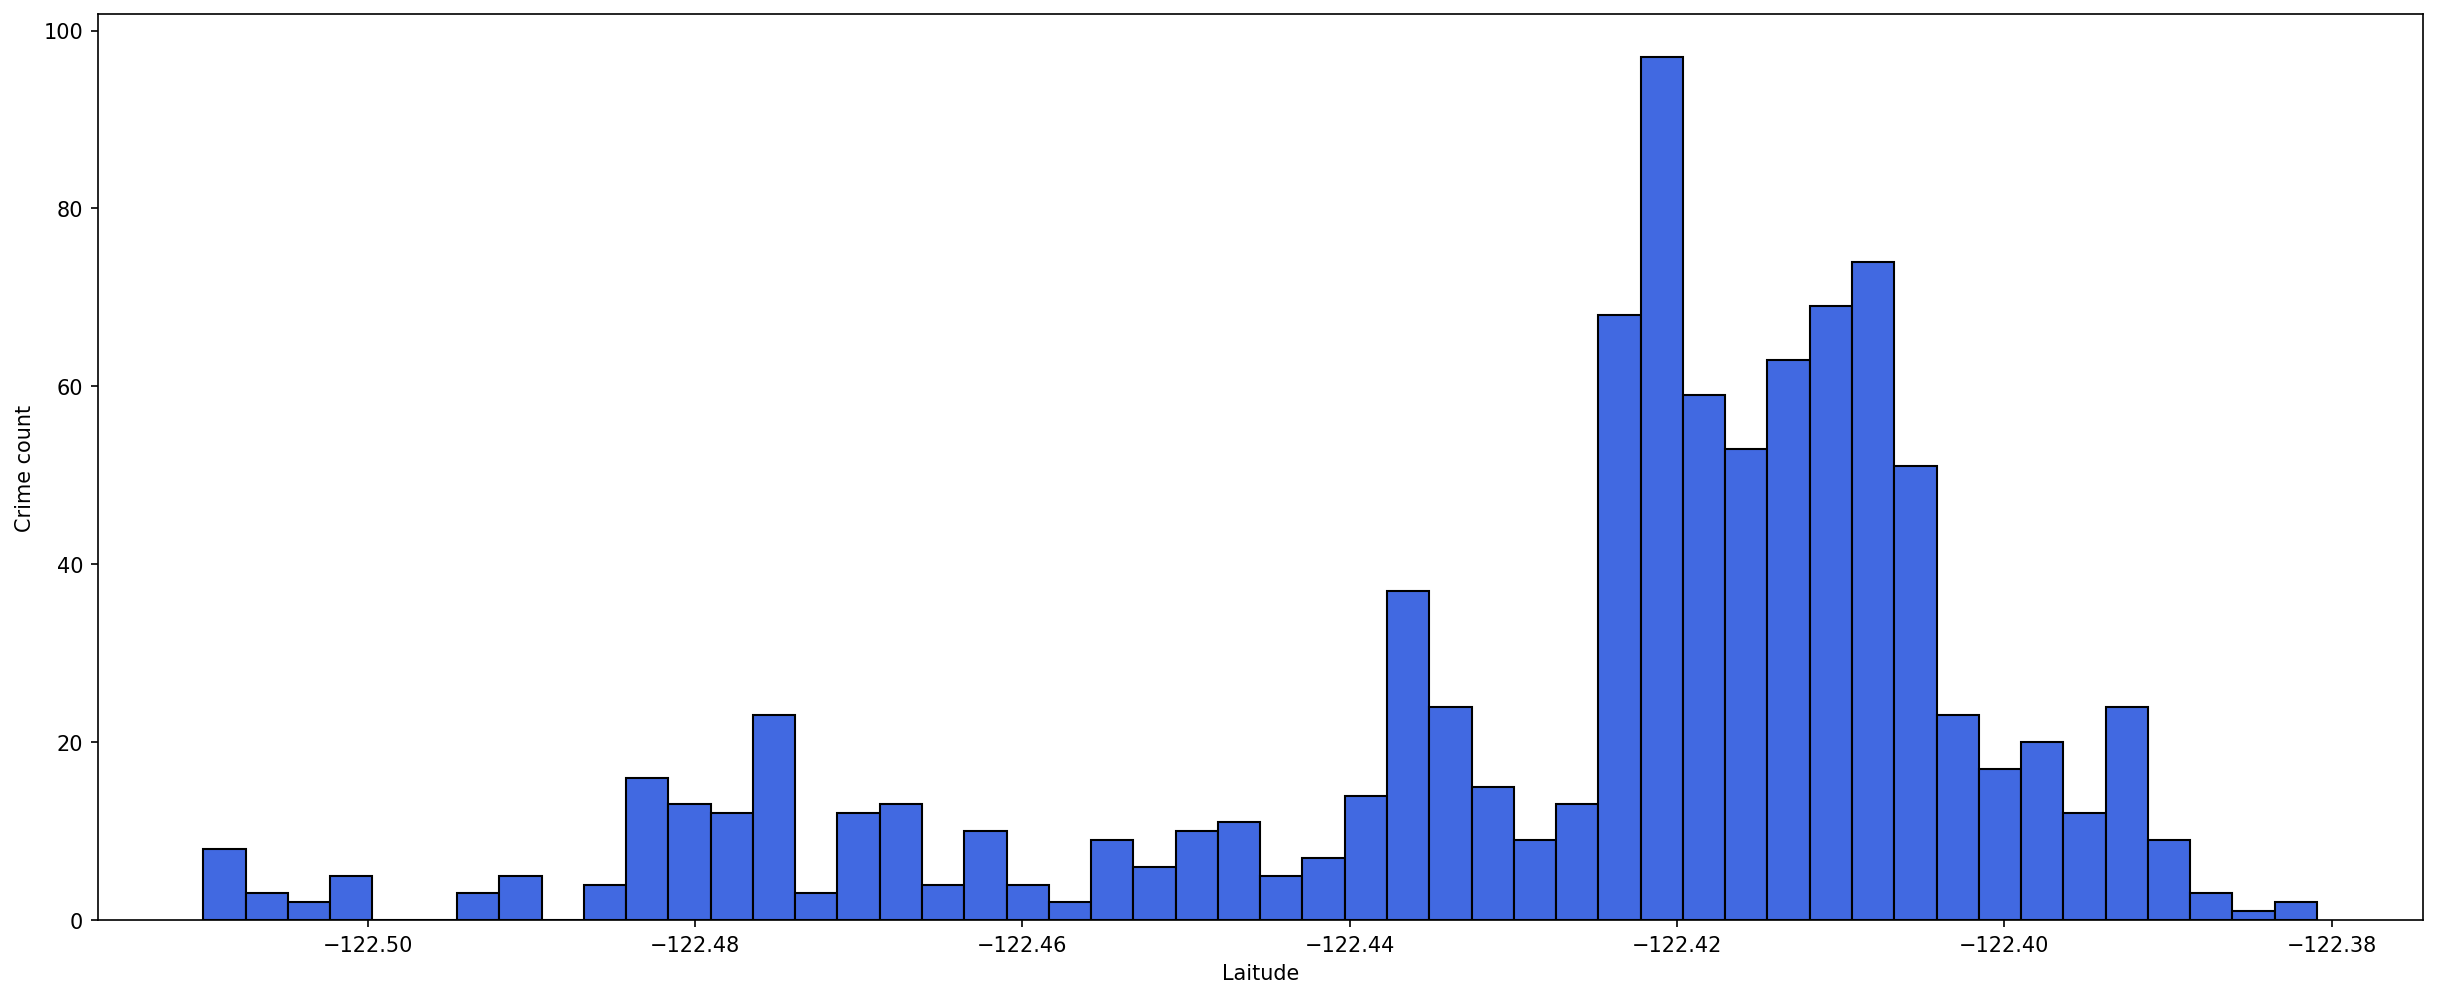

In [24]:
# The histogram of drunkenness crime
plot_hist(df,'2015-05-01','2017-05-01','DRUNKENNESS',50)
plt.xlabel('Laitude')
plt.ylabel('Crime count')
plt.show()

# Part 4: A bit of geo-data

- First a map of San Francisco is plotted from the latitude and longitude with Folium.
- Then the coordinates of San Francisco's City Hall is used to show its location on the map with a pop-up enabled marker. 
- Finally, the coordinates of all narcotic related police incidents from April and May of 2017 is plotted as a point scatter plot. It can be seen that a large part of the incidents occured in the area close to City Hall.

In [25]:
#If folium is not installed run this line
#!pip install folium

Remember to make the notebook **trusted** (in top right corner) else this will not show.

In [26]:
import pandas as pd
import folium
police = pd.read_csv(("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")) 
police['Date'] = pd.to_datetime(police['Date'])
map_sf = folium.Map([37.773972, -122.431297],tiles = 'Stamen Toner', zoom_start = 13)
folium.Marker([37.77919, -122.41914], popup='City Hall').add_to(map_sf)
drugs = police.loc[police.Category == 'DRUG/NARCOTIC']
drugs = drugs.loc[(drugs['Date'] >= '2017-04-01') & (drugs['Date'] <= '2017-05-31')]
lat = drugs.Y.values
lon = drugs.X.values
for i in range(len(lat)):
    folium.CircleMarker([lat[i], lon[i]],
                    radius=1,
                    fill = True,
                    color='red',
                    ).add_to(map_sf)
map_sf

The highest concentration of narcotics/drug cases are found in the area of Tenderloin, where City Hall is located, followed by the Mission neighbourhood. Both of these neighbourhoods are lower income areas that are also known for their night life, so this is perhaps to be expected.

Comparing the map with a map of residential population density - https://sfclimatehealth.org/portfolio/residential-population-density/ - show a clear overlap with densely populated areas, so some of the explanation could also be found simply in the amount of people in these areas.

A map of the police stations in San Francisco - https://www.google.com/maps/search/san+francisco+police+department/@37.7644104,-122.4421829,13z - also shows a higher density of police stations in the areas with a high number of police incidents, especially in the Downtown area by City Hall. It is not surprising if a higher police presense in an area translates to a higher number of registrations of incidents. 

# Part 5: Errors in the data. The importance of looking at raw (or close to raw) data.
<a id='Bottem'></a>

In [27]:
from IPython import display

In this bit of the report the focus will be to understand what is going on within the data. Three examples are given of why it is important to think about data and not just default to standard solutions.

### 5.1 In the hourly activity for PROSTITUTION something surprising is going on on Thursday. 
[Prostitution example](#Prostitution-spike)
Link to where this can be seen in our code

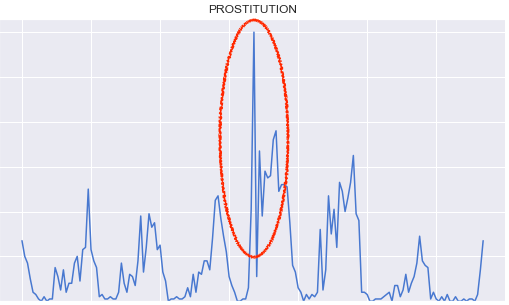

In [28]:
display.Image("https://raw.githubusercontent.com/suneman/socialdata2021/master/files/prostitution_hourly.png")

In this plot there is an anomaly around wednesday which suggest an outlier in the dataset, which are normally disregarded. Despite the outlier wednesday is the most active day regarding prostitution, but it has to be remembered this is reported cases and not actual crimes so it might have been reinforced because the police knows wednesday as the day to go check up on the expected areas where prostitution can be found.

###  5.2 When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. 

[Jitter Plot example](#Jitter-plot) <br>
also example given by Sune:
https://raw.githubusercontent.com/suneman/socialdata2021/master/files/jitter_plot.png

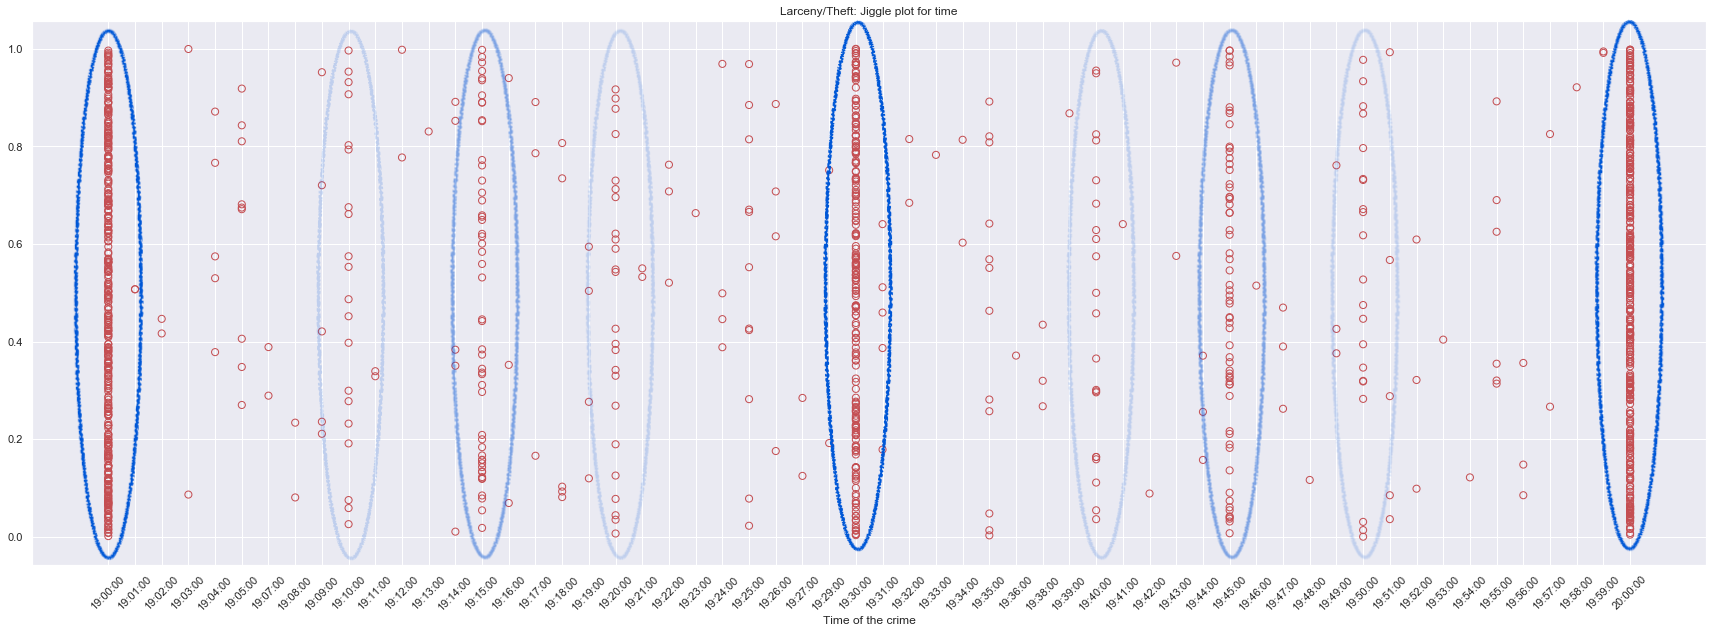

In [29]:
display.Image("https://raw.githubusercontent.com/suneman/socialdata2021/master/files/jitter_plot.png")

In this plot it can be seen that the police officers that arrest someone seem to approximate time of arrest. This makes it look like there is a pattern in when the arrests happen, where if you look at the ones in between the averages it seems random. This affects when modelling will think a lot of activity is going to happen, since it seems like these timeframes are the most compact with crime. However, these timeframes only ouccur due to unintended data manipulation and disregarding the half hourly points there does not seem to be a pattern, or the pattern is obscured by this approximation.

### 5.3 We saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences.

Last example of Sune: https://raw.githubusercontent.com/suneman/socialdata2021/master/files/crime_hot_spot.png

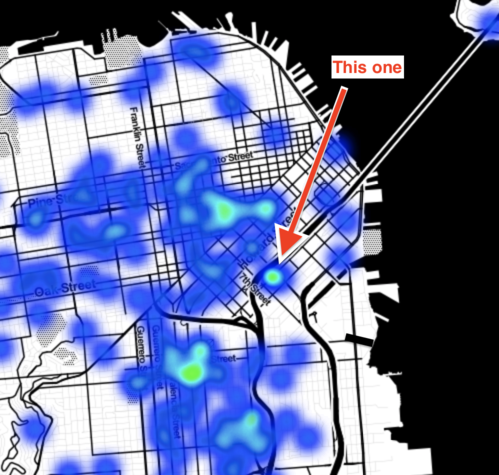

In [30]:
display.Image("https://raw.githubusercontent.com/suneman/socialdata2021/master/files/crime_hot_spot.png")

Since all criminals are put before a judge at the Hall of Justice, the level of sex offenses in that area cannot be contributed to just that area. If we look at Southern police district, a large portion of the attributed sex offenses are also from people outside of that area as well. This also suggest a fluid part of crime, which is crime is able to move from area to area and is not bound to certain districts even if recorded within a specific district.